In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("/content/cannabis.csv.zip")
print(df.shape)
df.head()

(2351, 6)


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2351 non-null   object 
 4   Flavor       2305 non-null   object 
 5   Description  2318 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


In [7]:
df.isnull().sum()

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64

In [10]:
df.describe()

,Rating
count,2351.000000
mean,4.310634
std,0.836394
min,0.000000
25%,4.200000
50%,4.400000
75%,4.700000
max,5.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


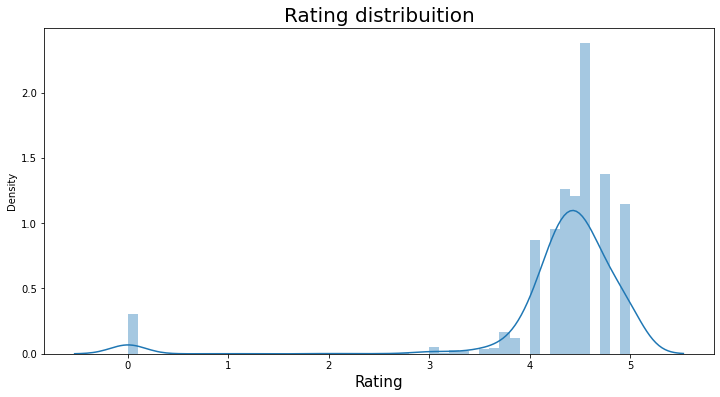

In [31]:
plt.figure(figsize=(12,6))

# total rating distribuition
d = sns.distplot(df["Rating"],
                 bins=50)
d.set_title("Rating distribuition", 
            size = 20)
d.set_xlabel('Rating',
             fontsize=15)

plt.show()

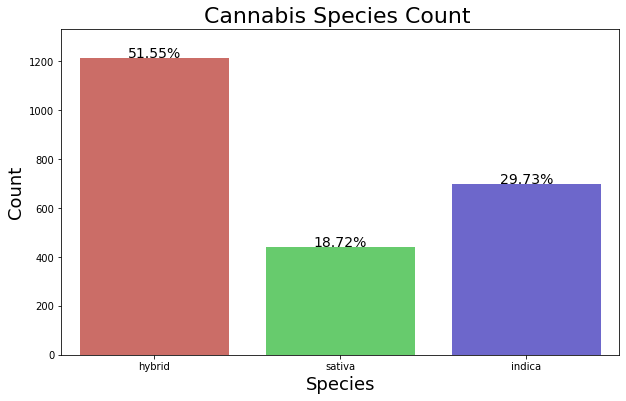

In [26]:
#look at the distribuition of each types
total = len(df)
plt.figure(figsize=(10,6))

d = sns.countplot(x="Type", data=df, 
                  palette='hls', color='blue')
d.set_title("Cannabis Species Count ", fontsize=22)
d.set_xlabel('Species', fontsize=18)
d.set_ylabel('Count', fontsize=18)
sizes=[]
for s in d.patches:
    height = s.get_height()
    sizes.append(height)
    d.text(s.get_x()+s.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
d.set_ylim(0, max(sizes) * 1.10)

plt.show()

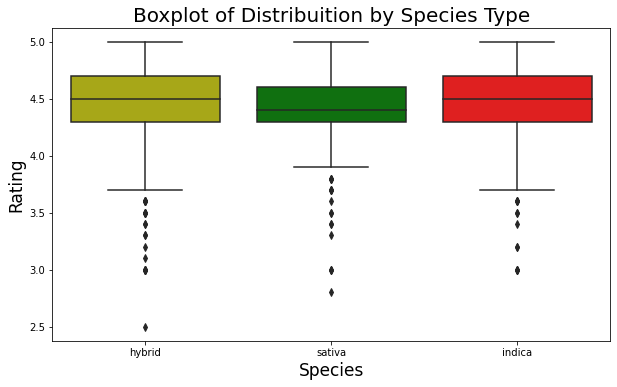

In [33]:
# using the boxplot to explore the Rating distribuition by Type
plt.figure(figsize=(10,6))
dis_type = {"hybrid": "y", "sativa": "g", "indica":"r"}

d1 = sns.boxplot(x="Type",y="Rating",  palette=dis_type,
                data=df[df["Rating"] > 2])
d1.set_title("Boxplot of Distribuition by Species Type", 
            fontsize=20)
d1.set_xlabel("Species", fontsize=17)
d1.set_ylabel("Rating", fontsize=17)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.85)

plt.show()

In [34]:
# get the effect of each strain and favor
# extract the values in Effects and Flavor and pass to a new column
df_effect = pd.DataFrame(df.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

df_flavors = pd.DataFrame(df.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])

In [36]:
# concate the new variables with strains
df = pd.concat([df, df_effect], axis=1)
df = pd.concat([df, df_flavors], axis=1)

# look the result
df.head()

df.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Effect_1', 'Effect_2', 'Effect_3', 'Effect_4', 'Effect_5', 'Flavor_1',
       'Flavor_2', 'Flavor_3'],
      dtype='object')

In [42]:
# create a subsets for each type
hibridas = df[df.Type == 'hybrid']
indicas = df[df.Type == 'indica']
sativas = df[df.Type == 'sativa']

In [43]:
# define a function to create a spliter
def get_effects(dataframe):
    ret_dict = {}
    for list_ef in dataframe.Effects:
        effects_list = list_ef.split(',')
        for effect in effects_list:
            if not effect in ret_dict:
                ret_dict[effect] = 1
            else:
                ret_dict[effect] += 1
    return ret_dict

In [44]:
# runing flavors counts to sativas
sativa_effects = get_effects(sativas)
sativa_effects = pd.DataFrame.from_dict(sativa_effects,
                                        orient='index').reset_index().rename(columns={'index': 'effects', 
                                                                                      0:'count'})

# get indicas flavors
indica_effects = get_effects(indicas)
indica_effects = pd.DataFrame.from_dict(indica_effects,
                                        orient='index').reset_index().rename(columns={'index': 'effects', 
                                                                                      0:'count'})

# get hibridas flavors
hibridas_effects = get_effects(hibridas)
hibridas_effects = pd.DataFrame.from_dict(hibridas_effects,
                                          orient='index').reset_index().rename(columns={'index': 'effects',
                                                                                        0:'count'})

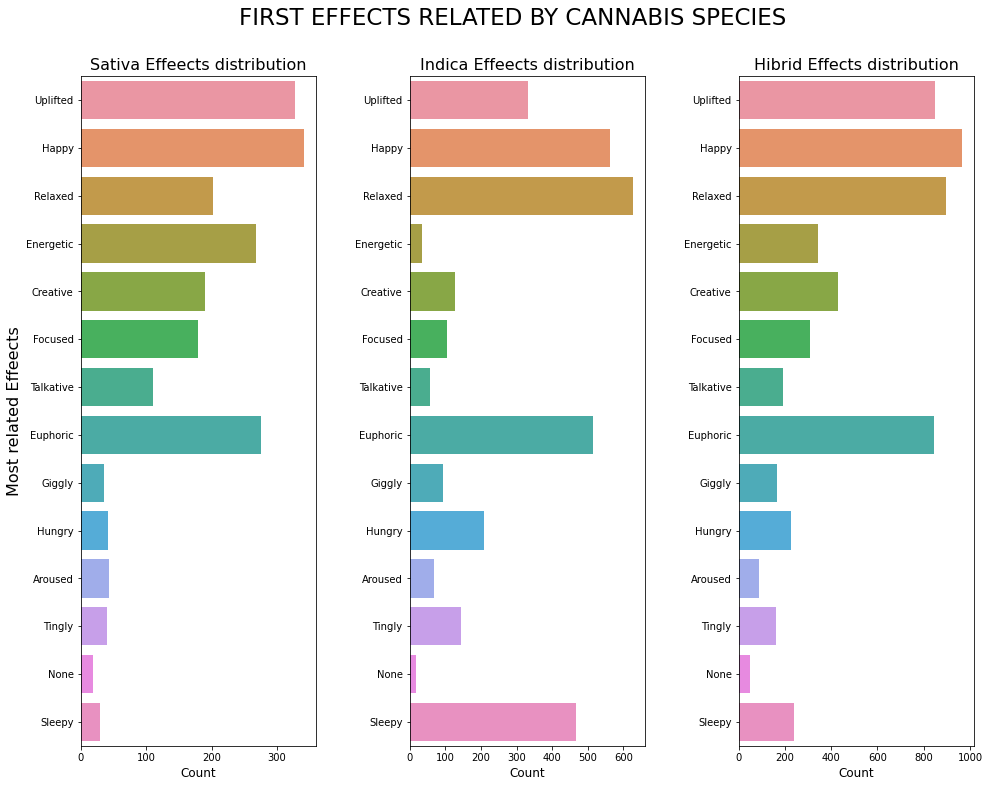

In [46]:
# first effects related by cannabis species
plt.figure(figsize=(16,12))

plt.suptitle('FIRST EFFECTS RELATED BY CANNABIS SPECIES', fontsize=23)

plt.subplot(131)
g = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values,
                data=sativa_effects, orient='h')
g.set_xlabel("Count", fontsize=12)
g.set_ylabel("Most related Effeects", fontsize=16)
g.set_title("Sativa Effeects distribution", fontsize=16)


plt.subplot(132)
g1 = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values,
                data=indica_effects, orient='h')
g1.set_xlabel("Count", fontsize=12)
g1.set_ylabel("",fontsize=12)
g1.set_title("Indica Effeects distribution", fontsize=16)


plt.subplot(133)
g2 = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values, 
                data=hibridas_effects, orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("Hibrid Effects distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.4,top = 0.90)

plt.show()